In [2]:
import tensorflow as tf
import keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


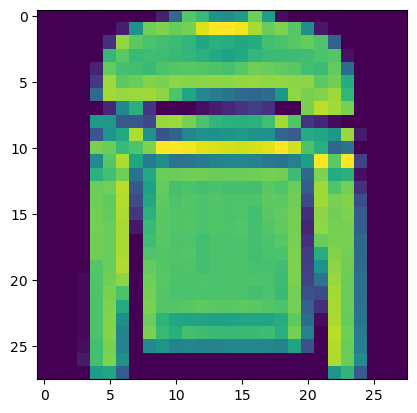

In [3]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [6]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]
#(x_train, x_valid) = x_train, x_train[:5000] 
#(y_train, y_valid) = y_train, y_train[:5000]


# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Create the model architecture

There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this notebook we are using the Sequential model API. 
If you are interested in a tutorial using the Functional API, checkout Sara Robinson's blog [Predicting the price of wine with the Keras Functional API and TensorFlow](https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03).

In defining the model we will be using some of these Keras APIs:
*   Conv2D() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - create a convolutional layer 
*   Pooling() [link text](https://keras.io/layers/pooling/) - create a pooling layer 
*   Dropout() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - apply drop out 

In [7]:
print(tf.keras.__version__)

2.10.0


In [8]:
my_augmenter = tf.keras.Sequential([
    layers.RandomTranslation(0, 0.3, fill_mode='constant')
])

model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(layers.Input((28,28,1)))

# model.add(layers.RandomTranslation(0, 0.3, fill_mode='constant')) # --- con KERAS 2.10.0 ha problemi!!
###model.add(augmenter) #--> there is some problem with keras 2.10... so we need to skip this heare...

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu')) 
#model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.build(input_shape=(28,28,1))
model.summary()

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                      

2023-01-07 18:49:21.816704: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-07 18:49:21.816853: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Define the Augmenter
There is a problem (apparently) in keras versio 2.10.0 that cause an improper behaviour of data augmentation if used direcly in the model... so instead of using augmenter into the processing layers of the model we apply a preprocessing layer for data augmentation...
When keras problem is resolved is interesteing to retry the test making the augmenters part of the model

In [9]:
class ImgDataset(tf.data.Dataset):
    def __init__(self) -> None:
        super().__init__()

In [10]:
AUTOTUNE = tf.data.AUTOTUNE
def prepare_data(ds, shuffle=False, augmenter=None, batch_size=64, autotune=AUTOTUNE):
    if shuffle:
        ds = ds.shuffle(1000)
    if augmenter != None: 
        ds = ds.map(lambda x,y: (augmenter(x, training=True), y), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size)
    return ds.prefetch(buffer_size=AUTOTUNE)


## Compile the model
Configure the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer 
*   A loss function 
*   A list of metrics 


In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])



## Train the model

Now let's train the model with fit() API.

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.


In [14]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
train_ds = prepare_data(train_ds, shuffle=True)#, augmenter=my_augmenter)
valid_ds = prepare_data(valid_ds, batch_size=64)

print(my_augmenter)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=0, width_shift_range=0.2,height_shift_range=0, horizontal_flip=False)
datagen.fit(x_train)

NameError: name 'x_train' is not defined

In [17]:
from keras.callbacks import ModelCheckpoint

checkpointer =  ModelCheckpoint(filepath='xmodel.weights.best.hdf5', verbose = 1, save_best_only=True)
""" model.fit(train_ds,
         batch_size=64,
         epochs=5,
         validation_data=valid_ds,
        callbacks=[checkpointer]) """

model.fit(x_train, y_train, 
    batch_size=64,
    epochs=5,
    validation_data=(x_valid, y_valid),
    callbacks=[checkpointer])

Epoch 1/5
859/860 [============================>.] - ETA: 0s - loss: 0.1010 - accuracy: 0.9616
Epoch 1: val_loss improved from inf to 0.29351, saving model to xmodel.weights.best.hdf5
860/860 [==============================] - 12s 14ms/step - loss: 0.1011 - accuracy: 0.9615 - val_loss: 0.2935 - val_accuracy: 0.9126
Epoch 2/5
860/860 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.9683
Epoch 2: val_loss improved from 0.29351 to 0.28763, saving model to xmodel.weights.best.hdf5
860/860 [==============================] - 13s 15ms/step - loss: 0.0836 - accuracy: 0.9683 - val_loss: 0.2876 - val_accuracy: 0.9160
Epoch 3/5
857/860 [============================>.] - ETA: 0s - loss: 0.0698 - accuracy: 0.9740
Epoch 3: val_loss did not improve from 0.28763
860/860 [==============================] - 12s 14ms/step - loss: 0.0697 - accuracy: 0.9741 - val_loss: 0.3062 - val_accuracy: 0.9182
Epoch 4/5
860/860 [==============================] - ETA: 0s - loss: 0.0587 - accuracy:

## Load Model with the best validation accuracy

In [ ]:
import h5py
print(h5py.__version__)

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## Test Accuracy

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

## Visualize prediction
Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
preds = []
ix = 24300
test_img = np.array(x_train[ix].reshape(1,28,28,1))
model.predict(test_img)

In [ ]:
preds = []
for px in range(-5,6):
    img = test_img
    img = img.reshape(28,28)
    img = np.roll(img, px, axis=1)
    #img_data = torch.tensor(img).view(-1,1,28,28).to(device)
    #np_out = model(img_data).cpu().detach().numpy()
    pred = model.predict(img.reshape(1,28,28,1))
    preds.append(pred)
    plt.imshow(img)
    plt.title(fashion_mnist_labels[pred[0].argmax()])
    plt.show()

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.title('Probability of each class for various translations')
sns.heatmap(np.array(preds).reshape(11,10), 
            annot=True, ax=ax, fmt='.2f', 
            xticklabels=fashion_mnist_labels, 
            yticklabels=[str(i)+str(' pixels') for i in range(-5,6)], 
            cmap='gray')